3. Разработать программу анализа арифметического выражения
(рис.8).
Программа должна:
а) напечатать приглашение для ввода строки; прочитать с клавиатуры строку, введенную пользователем;
б) с помощью стека проанализировать правильность расстановки
круглых скобок: если в строке встретилась открывающая скобка, то записать ее в стек; если встретилась закрывающая скобка, то извлечь один
символ из стека; операции записи и извлечения символа из стека реали-
зовать в виде двух функций: PUSH и POP. Функция PUSH принимает
символ и возвращает код возврата (0 - норма, 1 - переполнение стека),
функция POP возвращает символ с вершины стека и код возврата (0 -
норма, 1 - стек пуст);
в) напечатать сообщение о правильности или ошибочности введенной строки;
г) повторять действия, описанные в пп. а) - в), до тех пор, пока
пользователь не введет пробел.


In [ ]:
# Функция для добавления символа в стек
def push(stack, char, max_size=100):
    if len(stack) < max_size:
        stack.append(char)
        return 0  # 0 - добавлено успешно
    else:
        return 1  # 1 - переполнение стека

# Функция для удаления символа с вершины стека
def pop(stack):
    if stack:
        return stack.pop(), 0  # 0 - успешно удалено
    else:
        return None, 1  # 1 - стек пуст

# Основная функция для проверки правильности расстановки скобок
def check_parentheses(expression):
    stack = []
    for char in expression:
        if char == '(':
            code = push(stack, char)
            if code == 1:
                print("Ошибка: переполнение стека!")
                return False
        elif char == ')':
            popped_char, code = pop(stack)
            if code == 1:
                print("Ошибка: лишняя закрывающая скобка!")
                return False

    # Если после обработки строки стек пуст, то скобки сбалансированы
    if not stack:
        return True
    else:
        print("Ошибка: лишняя открывающая скобка!")
        return False

# Основной цикл программы
def main():
    while True:
        expression = input("Введите арифметическое выражение (или пробел для завершения): ").strip()
        
        # Проверяем условие завершения
        if expression == " ":
            print("Программа завершена.")
            break

        # Проверяем правильность расстановки скобок
        if check_parentheses(expression):
            print("Скобки расставлены правильно.")
        else:
            print("Ошибка в расстановке скобок.")

# Запуск программы

main()


4. Написать программу для вычисления выражения an по формуле
варианта, соответствующего номеру ЭВМ (варианты заданий). Вычисления организовать в виде рекурсивной функции. Программу выполнить по шагам, записать в конспекте последовательное изменение стека.
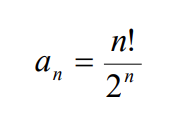


In [6]:
def factorial_recursive(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial_recursive(n - 1)/2

def calculate_an_recursive(n):
  
    
    return factorial_recursive(n) / 2

# Пример: вычисление для n = 5
n = 10
result = calculate_an_recursive(n)
print(f"a_{n} = {result}")


a_10 = 3543.75


6. Составить программу для формирования элементов массива.

In [14]:
def factorial_recursive(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial_recursive(n - 1)/2

def calculate_an_recursive(n):
    
    return factorial_recursive(n) / 2

# Пример: вычисление для n = 5
n = 10
a = []
for i in range(1, n+1):        
    result = calculate_an_recursive(i)
    a.append(result)

print(f"a_{n} = {a}")


a_10 = [0.5, 0.5, 0.75, 1.5, 3.75, 11.25, 39.375, 157.5, 708.75, 3543.75]


In [18]:
class krus:
    def __init__(self, n):
        self.parent = list(range(n))  # каждый элемент является своим родителем

    def find(self, u): # ищем корни
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])  # Если элемент u не является корнем своего множества, то мы продолжаем искать его родителя.
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        
        if root_u != root_v:
            self.parent[root_u] = root_v  # просто прикрепляем одно дерево к другому

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, weight, u, v):
        self.edges.append((weight, u - 1, v - 1))  # Преобразуем индексы в 0-based тк мы пишем индексы с 1, а питон с 0

    def kruskal(self):
        derevo = []
        disjoint_set = krus(self.V)
        
        # Сортируем ребра по весу
        self.edges.sort()
        
        for weight, u, v in self.edges:
            if disjoint_set.find(u) != disjoint_set.find(v): # если корни не равны то объединяем множества
                derevo.append((u + 1, v + 1, weight))  # Возвращаем индексы к 1-based
                disjoint_set.union(u, v)
                
        return derevo

# Пример использования
g = Graph(6)
g.add_edge(1, 1, 2)
g.add_edge(1, 3, 1)
g.add_edge(3, 2, 3)
g.add_edge(1, 2, 4)
g.add_edge(2, 3, 4)
g.add_edge(2, 2, 5)
g.add_edge(2, 5, 4)
g.add_edge(3, 5, 6)
g.add_edge(5, 6, 4)

derevo_kruskal = g.kruskal()
print("Минимальное остовное дерево (Крускал):")
for edge in derevo_kruskal:
    print(f"({edge[0]}-{edge[1]}), вес = {edge[2]}")


Минимальное остовное дерево (Крускал):
(1-2), вес = 1
(2-4), вес = 1
(3-1), вес = 1
(2-5), вес = 2
(5-6), вес = 3


In [22]:
import heapq

class Graph:
    def __init__(self, vertices): #вершины
        self.V = vertices
        self.graph = {i: [] for i in range(vertices)}

    def add_edge(self, weight, u, v):
        self.graph[u - 1].append((weight, v - 1))  # Преобразуем индексы в 0-based
        self.graph[v - 1].append((weight, u - 1))  # для неориентированного графа

    def prim(self): 
        derevo = []
        visited = [False] * self.V # отслеживаем посещенные вепшины
        min_heap = [(0, 0, -1)]  # (вес, текущая вершина, родитель)
        
        while min_heap: # пока есть вершины, которые не были добавлены в дерево
            weight, u, parent = heapq.heappop(min_heap) # вершину с минимальным весом из кучи
            if visited[u]:
                continue # ЕСЛИ посетили то пропускаем итерацию
            visited[u] = True
            if parent != -1:
                derevo.append((parent + 1, u + 1, weight))  # Возвращаем индексы к 1-based

            for edge_weight, v in self.graph[u]: # Для каждой соседней вершины v
                if not visited[v]:
                    heapq.heappush(min_heap, (edge_weight, v, u))#  Добавляем ребро (u, v) в кучу с весом edge_weight и указываем, что родителем вершины v является u.
        
        return derevo

# Пример использования
g = Graph(6)
g.add_edge(1, 1, 2)
g.add_edge(1, 3, 1)
g.add_edge(3, 2, 3)
g.add_edge(1, 2, 4)
g.add_edge(2, 3, 4)
g.add_edge(2, 2, 5)
g.add_edge(2, 5, 4)
g.add_edge(3, 5, 6)
g.add_edge(5, 6, 4)

derevo_prim = g.prim()
print("Минимальное остовное дерево (Прима):")
for edge in derevo_prim:
    print(f"({edge[0]}-{edge[1]}), вес = {edge[2]}")


Минимальное остовное дерево (Прима):
(1-2), вес = 1
(1-3), вес = 1
(2-4), вес = 1
(2-5), вес = 2
(5-6), вес = 3


UnboundLocalError: cannot access local variable 'u' where it is not associated with a value